<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [1]:
!pip install pandas
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

#### Step 1: Load the dataset


In [2]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)



### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




/tmp/ipykernel_1080/1231021515.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['JobSatPoints_6'] = pd.to_numeric(df_plot['JobSatPoints_6'], errors='coerce')


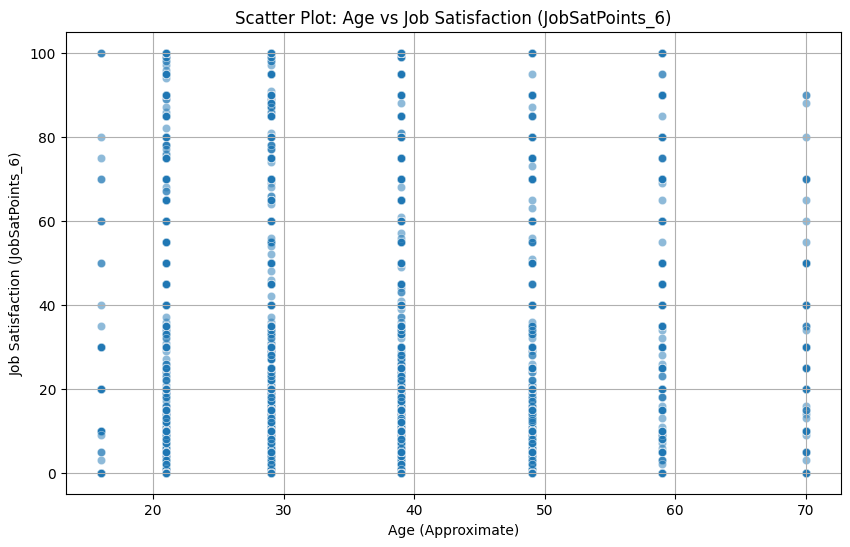

In [4]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from CSV (replace with your actual file path)
df = pd.read_csv(file_path)

# Map Age groups to approximate numeric values for plotting
age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 70,
    'Prefer not to say': None
}

# Apply mapping
df['Age_numeric'] = df['Age'].map(age_mapping)

# Drop rows with missing Age or JobSatPoints_6
df_plot = df.dropna(subset=['Age_numeric', 'JobSatPoints_6'])

# Convert JobSatPoints_6 to numeric (in case of any string issues)
df_plot['JobSatPoints_6'] = pd.to_numeric(df_plot['JobSatPoints_6'], errors='coerce')
df_plot = df_plot.dropna(subset=['JobSatPoints_6'])

# Plot scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age_numeric', y='JobSatPoints_6', data=df_plot, alpha=0.5)
plt.title('Scatter Plot: Age vs Job Satisfaction (JobSatPoints_6)')
plt.xlabel('Age (Approximate)')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')
plt.grid(True)
plt.show()

# Notes:
# - Age was mapped to approximate midpoints of age groups to allow numeric plotting.
# - The scatter plot helps identify any relationship between age and job satisfaction.
# - Patterns such as clustering or trends (increasing or decreasing satisfaction with age) can be visually inspected.
# - Overlapping points are expected; alpha=0.5 makes dense areas more visible.


#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


/tmp/ipykernel_1080/3849603780.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['ConvertedCompYearly'] = pd.to_numeric(df_plot['ConvertedCompYearly'], errors='coerce')
/tmp/ipykernel_1080/3849603780.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['JobSatPoints_6'] = pd.to_numeric(df_plot['JobSatPoints_6'], errors='coerce')


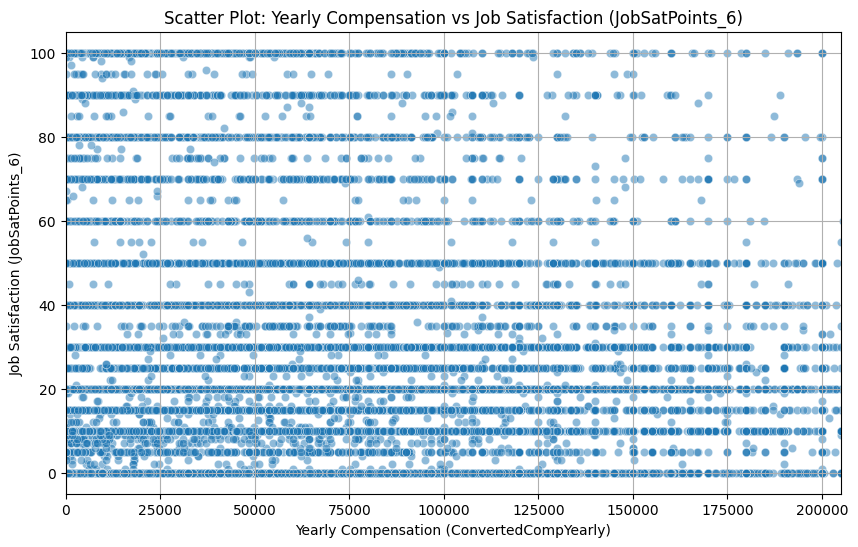

In [5]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from CSV (replace with your file path)
df = pd.read_csv(file_path)

# Drop rows with missing values in relevant columns
df_plot = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6'])

# Ensure numeric types for plotting
df_plot['ConvertedCompYearly'] = pd.to_numeric(df_plot['ConvertedCompYearly'], errors='coerce')
df_plot['JobSatPoints_6'] = pd.to_numeric(df_plot['JobSatPoints_6'], errors='coerce')
df_plot = df_plot.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6'])

# Plot scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='ConvertedCompYearly', y='JobSatPoints_6', data=df_plot, alpha=0.5)
plt.title('Scatter Plot: Yearly Compensation vs Job Satisfaction (JobSatPoints_6)')
plt.xlabel('Yearly Compensation (ConvertedCompYearly)')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')
plt.grid(True)
plt.xlim(0, df_plot['ConvertedCompYearly'].quantile(0.95))  # Limit x-axis to 95th percentile to reduce extreme outliers visibility
plt.show()

# Notes:
# - The x-axis is capped at the 95th percentile to minimize the effect of extreme outliers in compensation.
# - This scatter plot visualizes how job satisfaction relates to yearly compensation.
# - Look for trends such as increasing satisfaction with higher compensation or clusters.
# - Alpha transparency (0.5) helps show point density and overlapping data.


### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


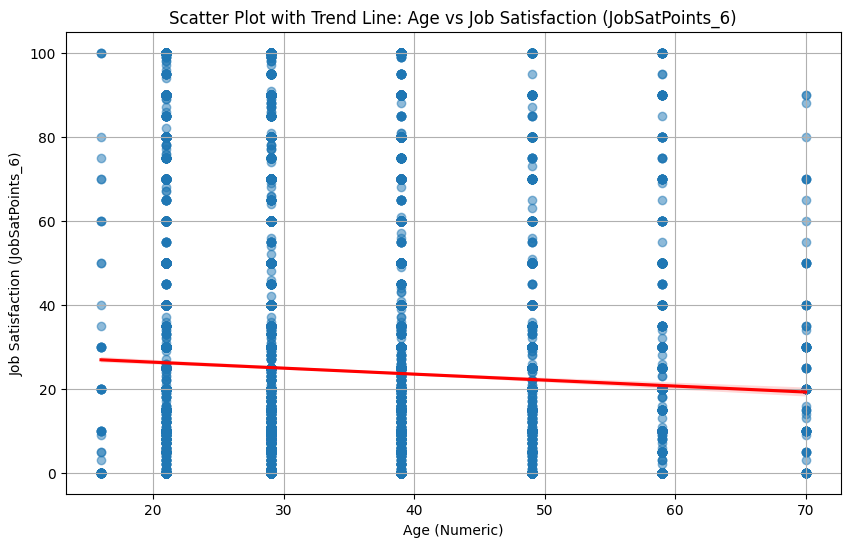

In [8]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from CSV
df = pd.read_csv(file_path)

# Map Age to numeric values
age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 70,
    'Prefer not to say': None
}
df['AgeNum'] = df['Age'].map(age_mapping)

# Drop missing values
df_plot = df.dropna(subset=['AgeNum', 'JobSatPoints_6'])

# Plot with regression line
plt.figure(figsize=(10,6))
sns.regplot(x='AgeNum', y='JobSatPoints_6', data=df_plot,
            scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Scatter Plot with Trend Line: Age vs Job Satisfaction (JobSatPoints_6)')
plt.xlabel('Age (Numeric)')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')
plt.grid(True)
plt.show()

# Notes:
# - Categorical age values are mapped to representative numeric values using age_mapping.
# - The red trend line shows the general direction of the relationship.
# - The plot helps to visualize if older or younger respondents report higher satisfaction.


#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


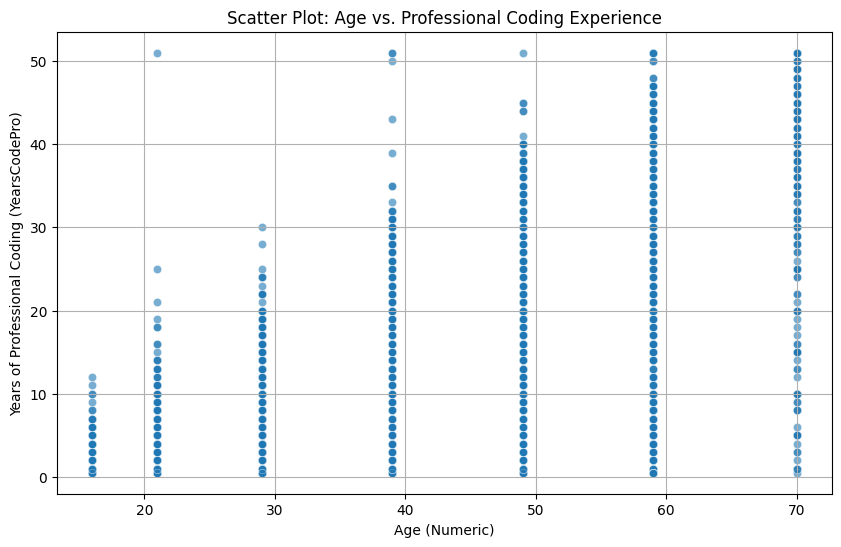

In [9]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
df = pd.read_csv(file_path)

# Map Age to approximate numeric values
age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 70,
    'Prefer not to say': None
}
df['AgeNum'] = df['Age'].map(age_mapping)

# Convert YearsCodePro to numeric (e.g., 'Less than 1 year' -> 0.5, 'More than 50 years' -> 51)
def convert_years_code_pro(val):
    if pd.isna(val):
        return None
    if isinstance(val, str):
        if 'Less than 1 year' in val:
            return 0.5
        elif 'More than 50 years' in val:
            return 51
        else:
            try:
                return float(val)
            except:
                return None
    return val

df['YearsCodeProNum'] = df['YearsCodePro'].apply(convert_years_code_pro)

# Drop missing values for clean plotting
df_clean = df.dropna(subset=['AgeNum', 'YearsCodeProNum'])

# Plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='AgeNum', y='YearsCodeProNum', data=df_clean, alpha=0.6)
plt.title('Scatter Plot: Age vs. Professional Coding Experience')
plt.xlabel('Age (Numeric)')
plt.ylabel('Years of Professional Coding (YearsCodePro)')
plt.grid(True)
plt.show()


### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


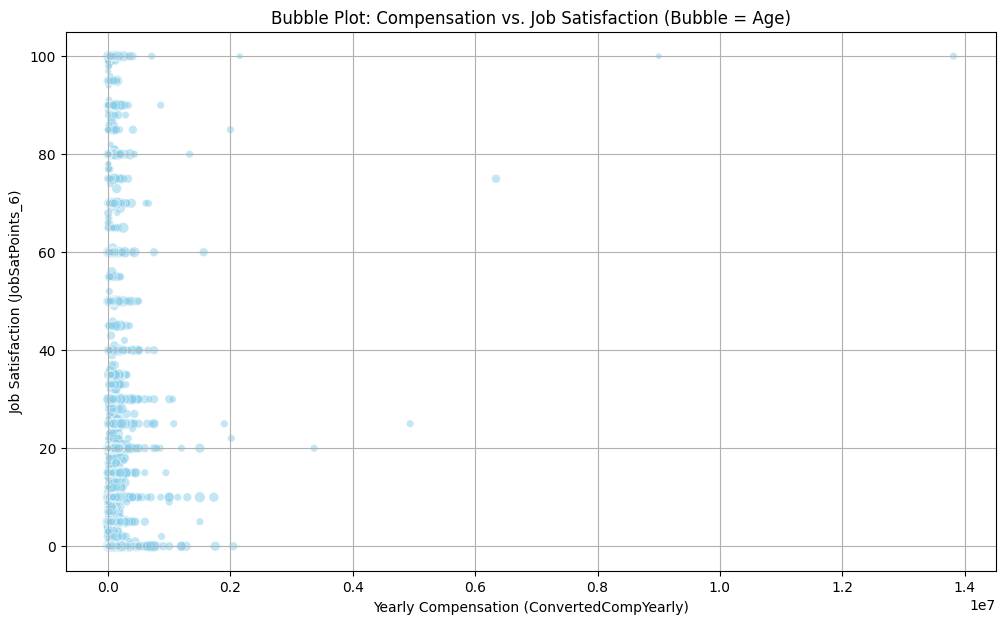

In [11]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv(file_path)

# Map Age to numeric values for bubble size
age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 70,
    'Prefer not to say': None
}
df['AgeNum'] = df['Age'].map(age_mapping)

# Drop rows with missing data in key columns
df_clean = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'AgeNum'])

# Create the bubble plot
plt.figure(figsize=(12, 7))
plt.scatter(
    x=df_clean['ConvertedCompYearly'],
    y=df_clean['JobSatPoints_6'],
    s=df_clean['AgeNum'],  # Bubble size
    alpha=0.5,
    c='skyblue',
    edgecolors='w',
    linewidth=0.5
)
plt.title('Bubble Plot: Compensation vs. Job Satisfaction (Bubble = Age)')
plt.xlabel('Yearly Compensation (ConvertedCompYearly)')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')
plt.grid(True)
plt.show()


#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


/tmp/ipykernel_1080/1568645095.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['LanguageHaveWorkedWith'] = df_clean['LanguageHaveWorkedWith'].str.split(';')


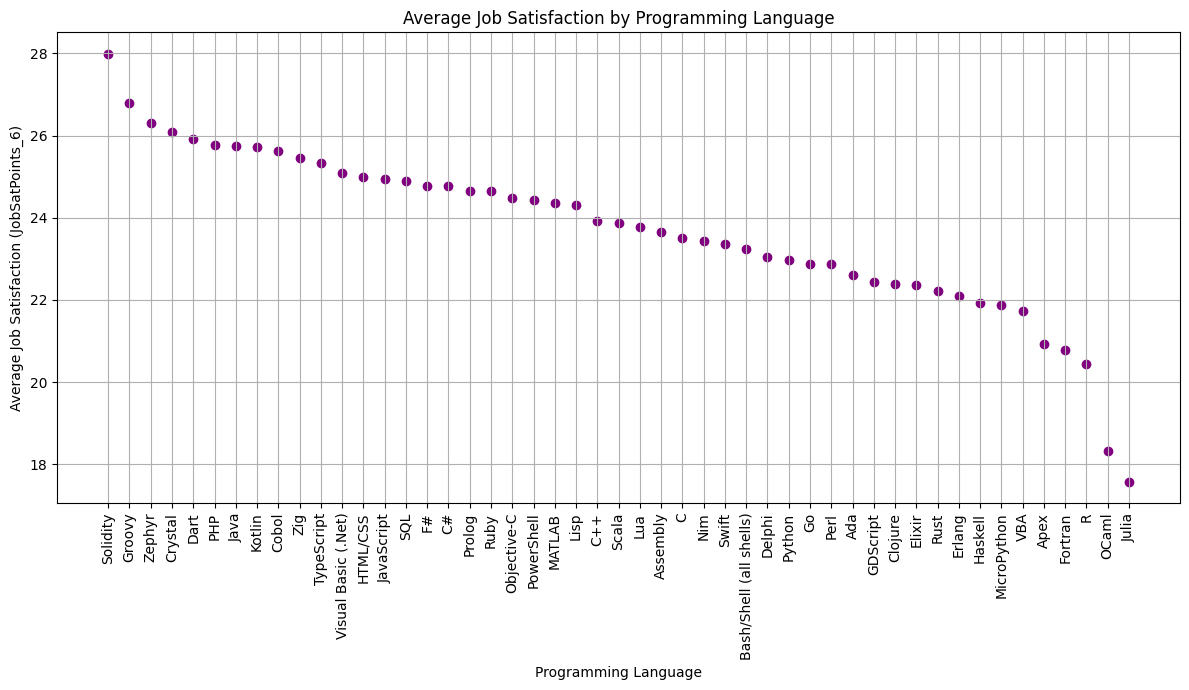

In [12]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv(file_path)

# Drop rows with missing values in either column
df_clean = df.dropna(subset=['LanguageHaveWorkedWith', 'JobSatPoints_6'])

# Explode the languages into individual rows
df_clean['LanguageHaveWorkedWith'] = df_clean['LanguageHaveWorkedWith'].str.split(';')
df_exploded = df_clean.explode('LanguageHaveWorkedWith')

# Group by language and calculate mean job satisfaction
language_satisfaction = df_exploded.groupby('LanguageHaveWorkedWith')['JobSatPoints_6'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 7))
plt.scatter(language_satisfaction.index, language_satisfaction.values, color='purple')
plt.xticks(rotation=90)
plt.title('Average Job Satisfaction by Programming Language')
plt.xlabel('Programming Language')
plt.ylabel('Average Job Satisfaction (JobSatPoints_6)')
plt.grid(True)
plt.tight_layout()
plt.show()


### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


/tmp/ipykernel_1080/2683647969.py:30: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


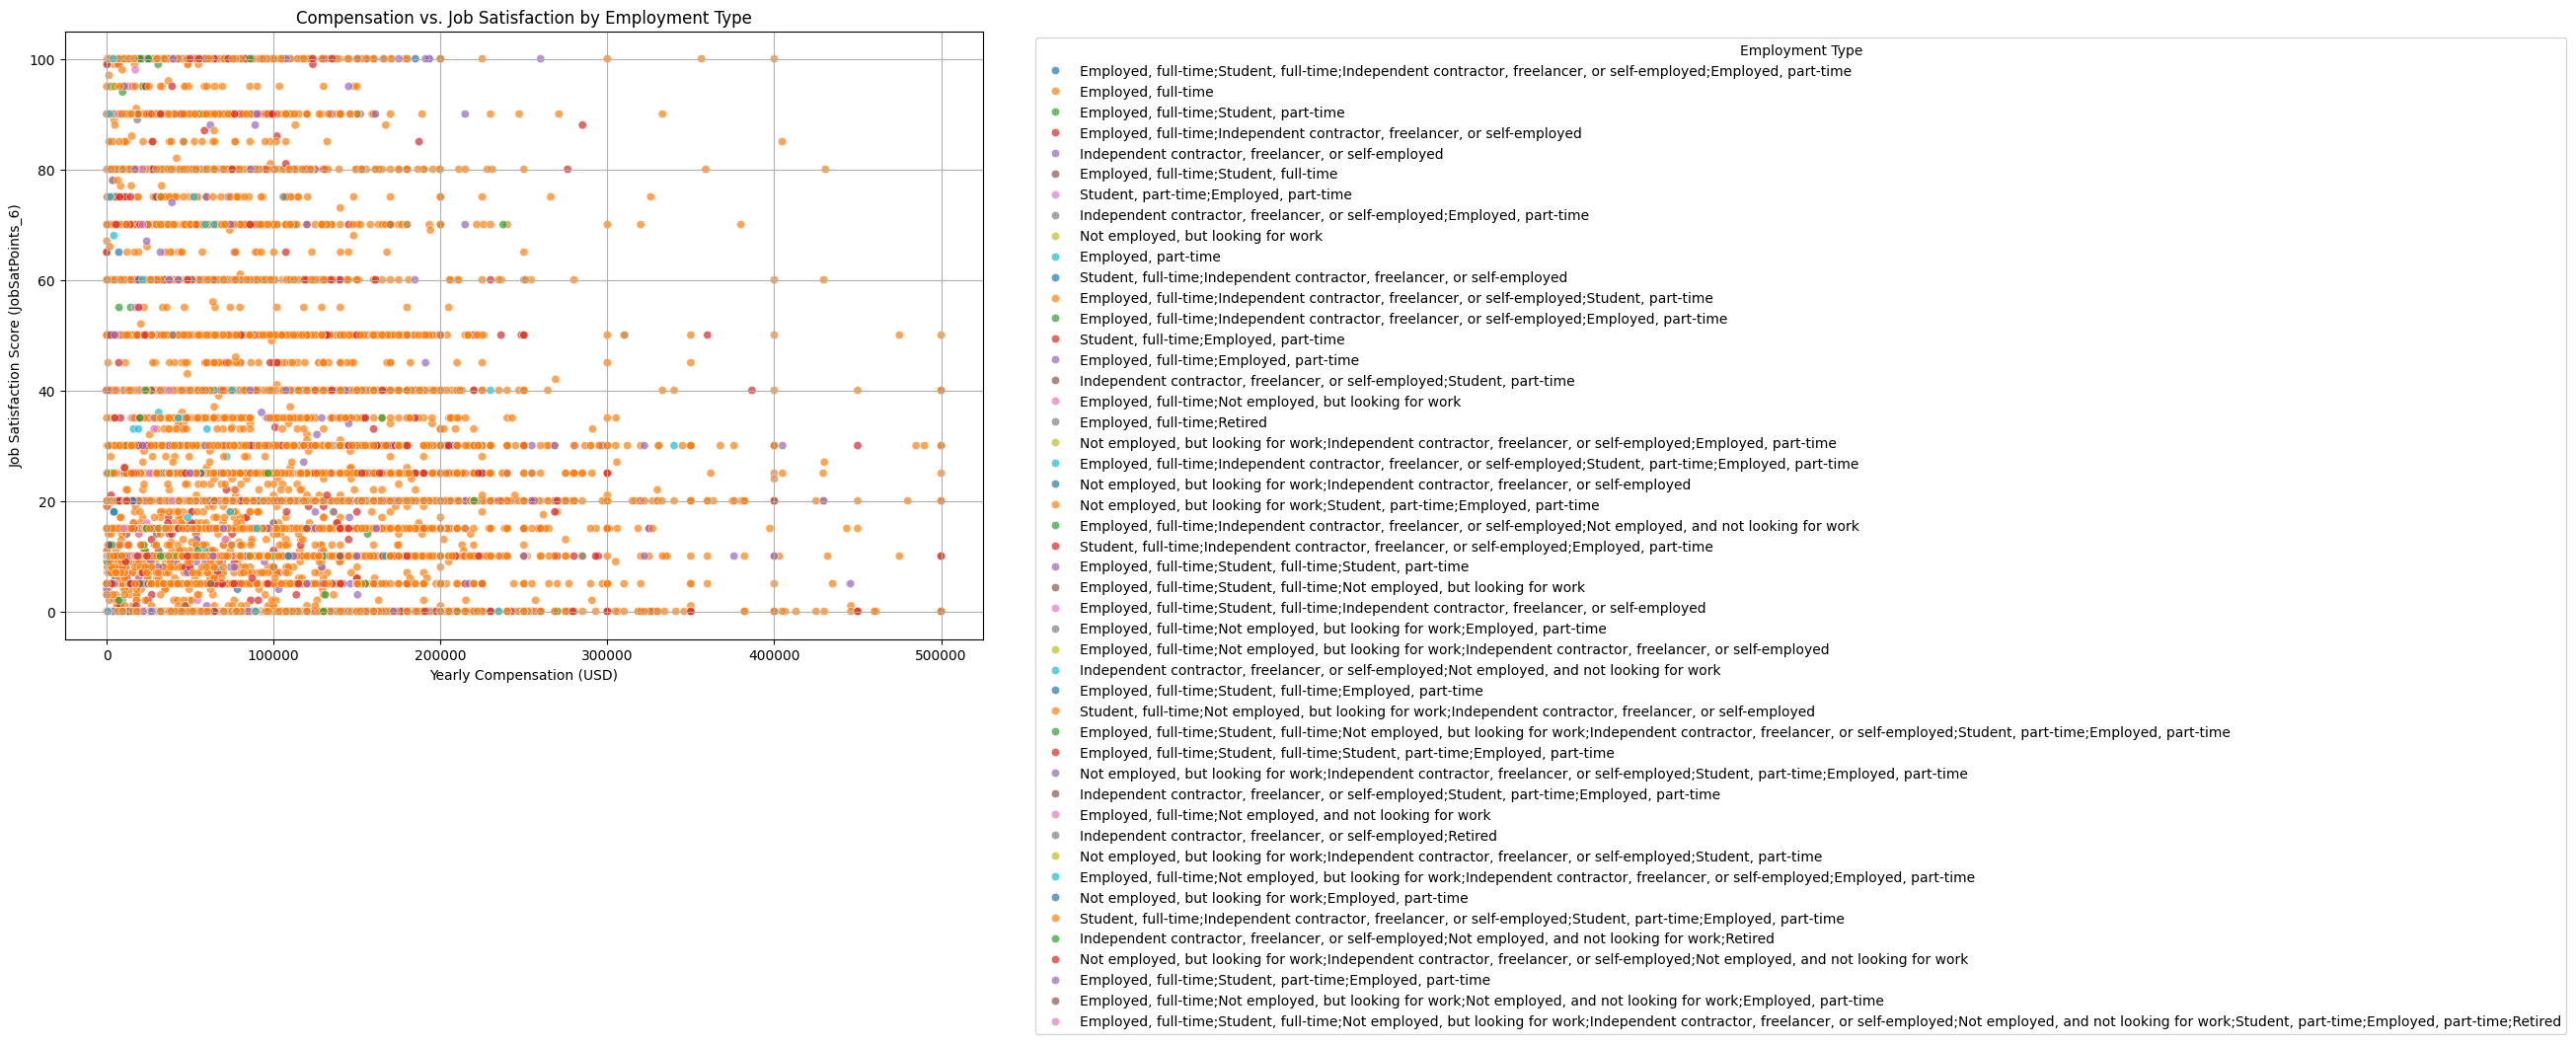

In [14]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(file_path)

# Drop missing values in relevant columns
df_clean = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'Employment'])

# Optional: Filter out extremely high compensation values (e.g., > $500,000) to reduce skew
df_clean = df_clean[df_clean['ConvertedCompYearly'] <= 500000]

# Plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_clean,
    x='ConvertedCompYearly',
    y='JobSatPoints_6',
    hue='Employment',
    alpha=0.7,
    palette='tab10'
)

plt.title('Compensation vs. Job Satisfaction by Employment Type')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction Score (JobSatPoints_6)')
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()


#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


/tmp/ipykernel_1080/3782877917.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['YearsCodePro'] = df_clean['YearsCodePro'].apply(convert_experience)


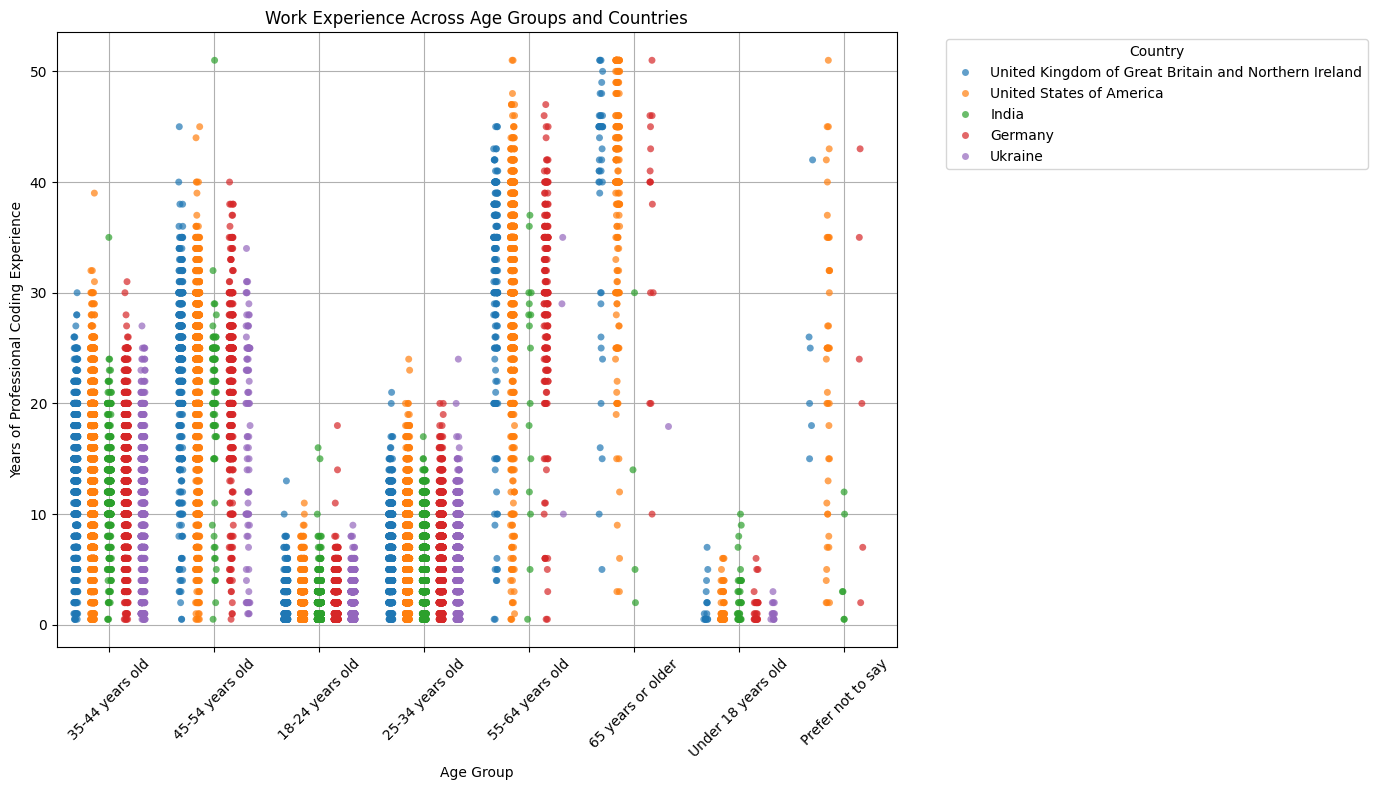

In [15]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(file_path)

# Drop rows with missing values in relevant columns
df_clean = df.dropna(subset=['YearsCodePro', 'Age', 'Country'])

# Convert YearsCodePro to numeric
def convert_experience(val):
    if val == 'Less than 1 year':
        return 0.5
    elif val == 'More than 50 years':
        return 51
    try:
        return float(val)
    except:
        return None

df_clean['YearsCodePro'] = df_clean['YearsCodePro'].apply(convert_experience)

# Optional: Limit to top 5 countries by count for clarity
top_countries = df_clean['Country'].value_counts().head(5).index
df_clean = df_clean[df_clean['Country'].isin(top_countries)]

# Plot
plt.figure(figsize=(14, 8))
sns.stripplot(
    data=df_clean,
    x='Age',
    y='YearsCodePro',
    hue='Country',
    dodge=True,
    jitter=True,
    alpha=0.7
)

plt.title('Work Experience Across Age Groups and Countries')
plt.xlabel('Age Group')
plt.ylabel('Years of Professional Coding Experience')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
